In [ ]:
# To plot mean SCR Amplitude for all subjects across all sessions

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 1

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Height'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_mean_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_means.items():
    for subject, mean in value_for_all_subjects:
        if subject not in sessions_mean_new:
            sessions_mean_new[subject] = []
        sessions_mean_new[subject].append([session, mean])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_mean_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


# Reset index to have 'Subject' as a column for plotting purposes
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subject'}, inplace=True)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars=['Subject'], var_name='Session', value_name='Value')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='Session', y='Value', hue='Subject', marker='o')

# Custom labels for the x-axis
labels = [
    'Session 1 \n Apartment A', 
    'Session 2\n Apartment B', 
    'Session 3\n Apartment C', 
    'Session 4\n Apartment C', 
    'Session 5\n Apartment A \n (Distant Condition)',
    'Session 5\n Apartment B \n (Near Condition)'
]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Labels and title
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Subject Values Across Sessions')
plt.tight_layout()
#plt.show()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/SCR_Height_Across_Sessions.png", dpi=300, bbox_inches='tight')  


In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [2]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

In [ ]:
# Calculate mean SCR Amplitude for each subject for sessions 1-5b
import os

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Display one df
print(session_means['session1'])

In [ ]:
import os
import pandas as pd

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Concatenate all session means DataFrames into a single DataFrame
all_session_means = pd.concat(session_means.values(), ignore_index=True)

# Add a column to indicate the session
all_session_means['session'] = all_session_means.index.map(lambda x: session_names[x // len(session_means['session1'])])

# Display the combined DataFrame
print(all_session_means)




In [13]:
# To plot sum of SCR Peaks for all subjects across all sessions

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 1

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_sums = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Onsets'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_sum_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_sums.items():
    for subject, sum in value_for_all_subjects:
        if subject not in sessions_sum_new:
            sessions_sum_new[subject] = []
        sessions_sum_new[subject].append([session, mean])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_sum_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)

"""
# Reset index to have 'Subject' as a column for plotting purposes
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subject'}, inplace=True)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars=['Subject'], var_name='Session', value_name='Value')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='Session', y='Value', hue='Subject', marker='o')

# Custom labels for the x-axis
labels = [
    'Session 1 \n Apartment A', 
    'Session 2\n Apartment B', 
    'Session 3\n Apartment C', 
    'Session 4\n Apartment C', 
    'Session 5\n Apartment A \n (Distant Condition)',
    'Session 5\n Apartment B \n (Near Condition)'
]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Labels and title
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Subject Values Across Sessions')
plt.tight_layout()
#plt.show()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/SCR_Peaks_Across_Sessions.png", dpi=300, bbox_inches='tight')  
print ("hello")"""


        session1  session2  session3  session4  session5a  session5b
sub-1   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-2   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-3   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-4   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-6   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-7   0.000047  0.000047       NaN       NaN   0.000047   0.000047
sub-8   0.000047  0.000047       NaN  0.000047   0.000047   0.000047
sub-9   0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-10  0.000047  0.000047  0.000047  0.000047   0.000047   0.000047
sub-11  0.000047  0.000047  0.000047  0.000047   0.000047   0.000047


'\n# Reset index to have \'Subject\' as a column for plotting purposes\ndf.reset_index(inplace=True)\ndf.rename(columns={\'index\': \'Subject\'}, inplace=True)\n\n# Melt the DataFrame for seaborn compatibility\ndf_melted = df.melt(id_vars=[\'Subject\'], var_name=\'Session\', value_name=\'Value\')\n\n# Plotting with seaborn\nplt.figure(figsize=(20, 8))\nsns.lineplot(data=df_melted, x=\'Session\', y=\'Value\', hue=\'Subject\', marker=\'o\')\n\n# Custom labels for the x-axis\nlabels = [\n    \'Session 1 \n Apartment A\', \n    \'Session 2\n Apartment B\', \n    \'Session 3\n Apartment C\', \n    \'Session 4\n Apartment C\', \n    \'Session 5\n Apartment A \n (Distant Condition)\',\n    \'Session 5\n Apartment B \n (Near Condition)\'\n]\nplt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)\n\n# Labels and title\nplt.xlabel(\'Session\')\nplt.ylabel(\'Value\')\nplt.title(\'Subject Values Across Sessions\')\nplt.tight_layout()\n#plt.show()\n\nif save_figs == 1:\n    plt.savefig(f"

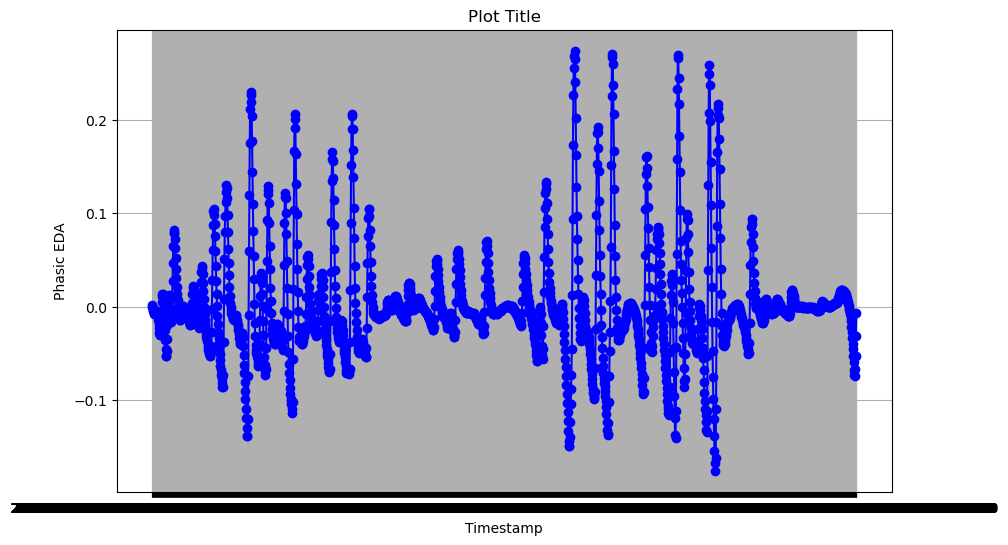

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-1/session-4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming the x-axis and y-axis data are in columns named 'x_column' and 'y_column'
x_data = df['timestamp']
y_data = df['EDA_Phasic']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Phasic EDA')
plt.title('Plot Title')

# Show the plot
plt.grid(True)
plt.show()

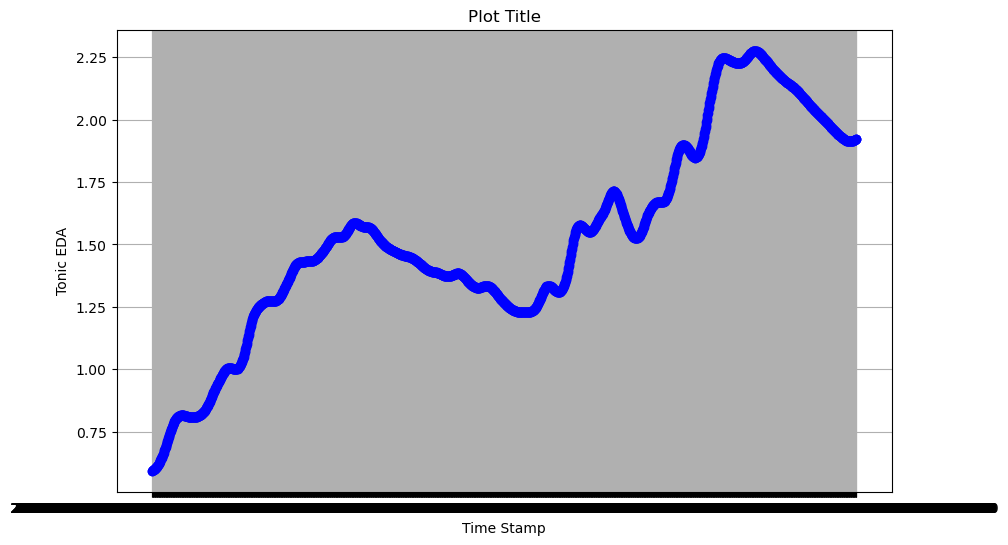

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-1/session-4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming the x-axis and y-axis data are in columns named 'x_column' and 'y_column'
x_data = df['timestamp']
y_data = df['EDA_Tonic']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Time Stamp')
plt.ylabel('Tonic EDA')
plt.title('Plot Title')

# Show the plot
plt.grid(True)
plt.show()